In [1]:
# Loading all needed packages at the start
import elastix 
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import os
import SimpleITK as sitk

## Fill in your own paths in the cell below ##

In [6]:
# to Elastix.exe
ELASTIX_PATH = 'C:/Users/20191679/Documents/Master/CS_image_analysis/Elastix.exe'
el = elastix.ElastixInterface(elastix_path=ELASTIX_PATH)
# to Transformix.exe
TRANSFORMIX_PATH = 'C:/Users/20191679/Documents/Master/CS_image_analysis/Transformix.exe'
# to TrainingData
filepath_data = r'C:\Users\20191679\Documents\Master\CS_image_analysis\TrainingData'


### Load patient data and inspect

In [7]:
patient_nrs_list = ['p102','p107', 'p108', 'p109', 'p115', 'p116', 'p117', 
                    'p119', 'p120', 'p125', 'p127','p128', 'p129', 'p133', 'p135']
patient_nr = patient_nrs_list[14] #pick any index up to 14 for that patient
file_p_mr = filepath_data+ '\{}\mr_bffe.mhd'.format(patient_nr)  # example of patient 102 input MR image
file_p_mask = filepath_data+'\{}\prostaat.mhd'.format(patient_nr) # example of patient 102 segmentation mask

# Convert so images can be inspected
readable_mr = imageio.imread(file_p_mr)
readable_mask = imageio.imread(file_p_mask)

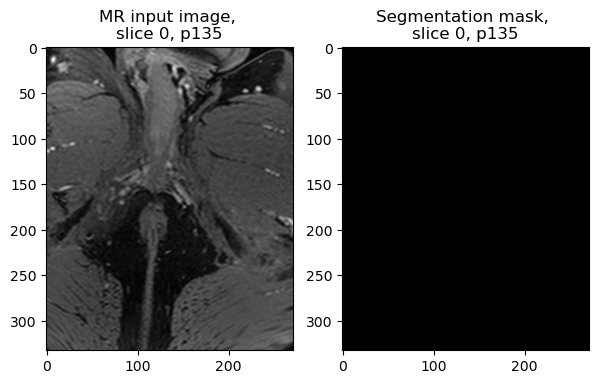

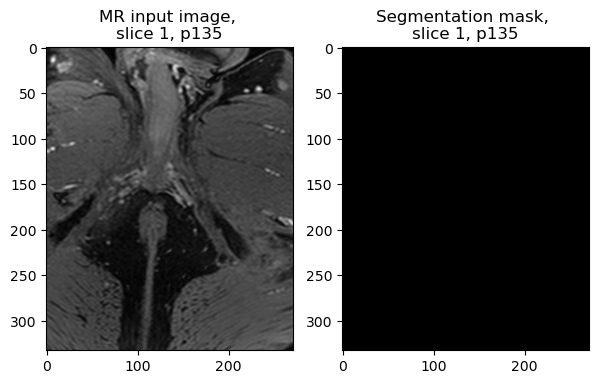

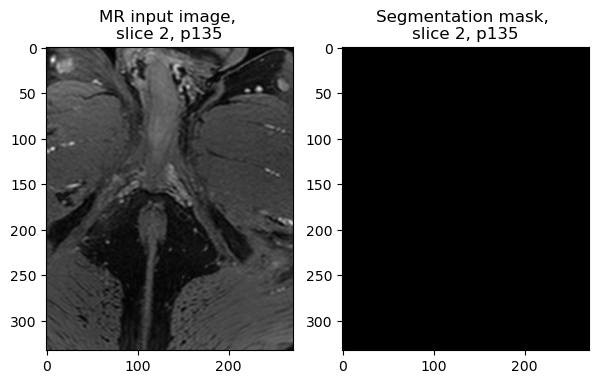

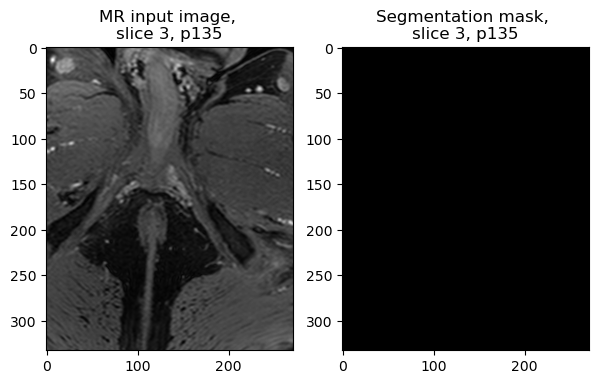

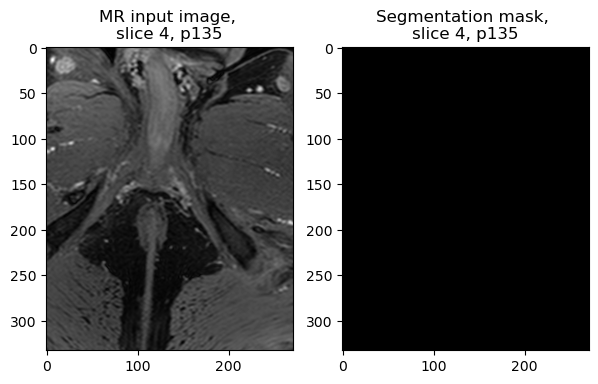

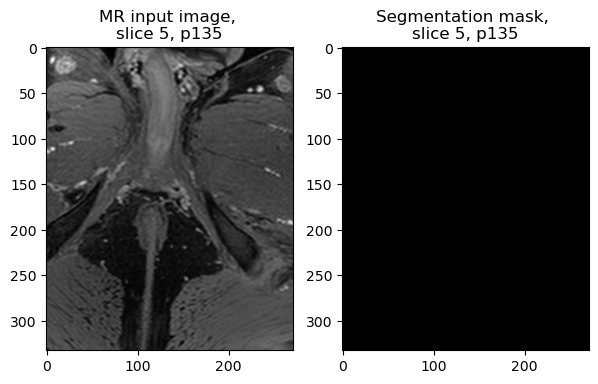

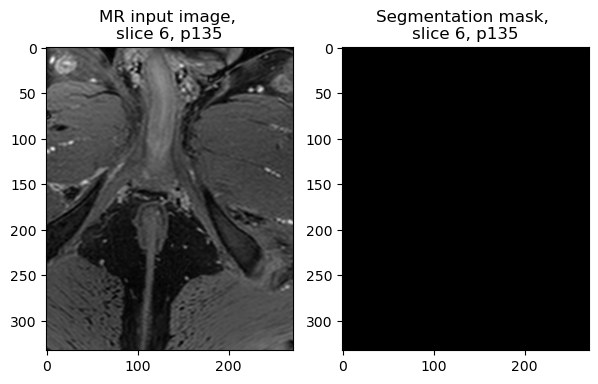

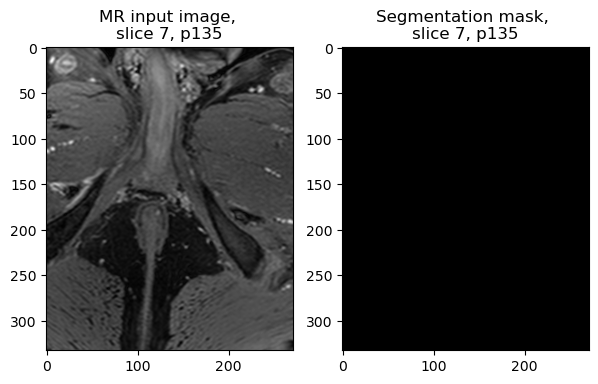

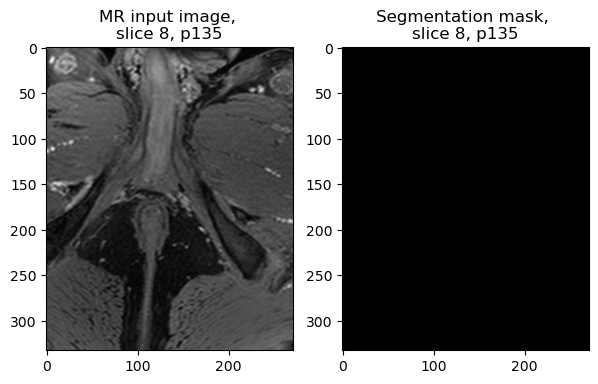

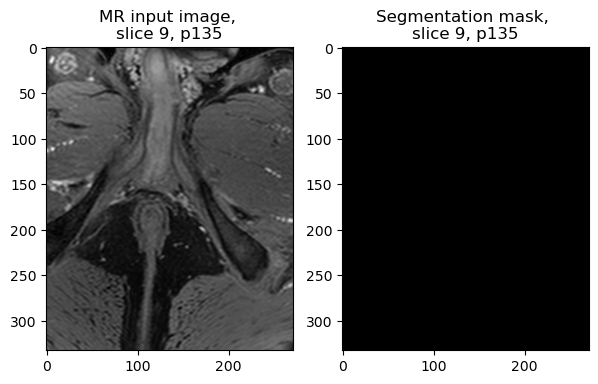

In [8]:
# Visualize the slices you want to inspect, together with segmentation mask
for i in range(10):
    fig, ax = plt.subplots(1, 2, figsize=(7, 5))
    ax[0].imshow(readable_mr[i,:,:], cmap='gray')
    ax[0].set_title('MR input image, \nslice {}, {}'.format(i, patient_nr))
    ax[1].imshow(readable_mask[i,:,:], cmap='gray')
    ax[1].set_title('Segmentation mask, \nslice {}, {}'.format(i, patient_nr))
    plt.show()

In [9]:
## Try out some transformation with elastix, bspline multires parameters file

In [10]:
parameter_file_path_experiment = os.path.join(filepath_data,'parameters_bspline_multires_MR.txt')
output_file_path_experiment = os.path.join(filepath_data,'results')

fixed_image_path = filepath_data+'\p107\mr_bffe.mhd'
moving_image_path = filepath_data+'\p102\mr_bffe.mhd'

print(parameter_file_path_experiment)

C:\Users\20191679\Documents\Master\CS_image_analysis\TrainingData\parameters_bspline_multires_MR.txt


In [17]:
#try affine registration first
elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.SetFixedImage(sitk.ReadImage(fixed_image_path))
elastixImageFilter.SetMovingImage(sitk.ReadImage(moving_image_path))
elastixImageFilter.SetParameterMap(sitk.GetDefaultParameterMap("affine"))
elastixImageFilter.Execute()
sitk.WriteImage(elastixImageFilter.GetResultImage())

AttributeError: module 'SimpleITK' has no attribute 'ElastixImageFilter'

C:/Users/20191679/Documents/Master/CS_image_analysis/Elastix.exe -f C:\Users\20191679\Documents\Master\CS_image_analysis\TrainingData\p107\mr_bffe.mhd -m C:\Users\20191679\Documents\Master\CS_image_analysis\TrainingData\p102\mr_bffe.mhd -p C:\Users\20191679\Documents\Master\CS_image_analysis\TrainingData\affine_registration.txt -out C:\Users\20191679\Documents\Master\CS_image_analysis\TrainingData\results


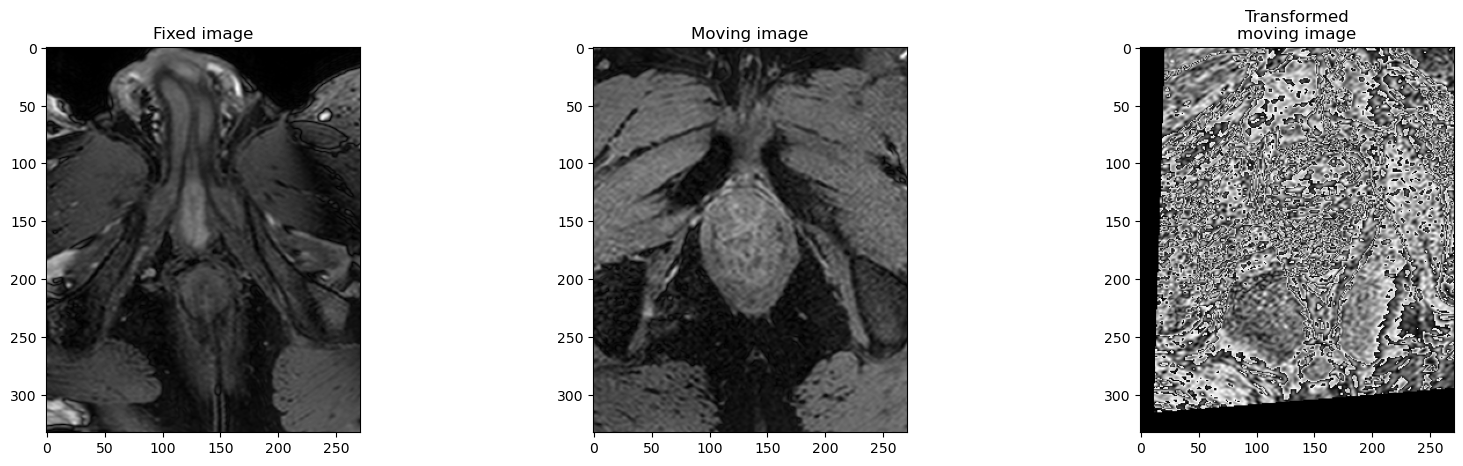

In [26]:
parameter_file_path_experiment = os.path.join(filepath_data,'affine_registration.txt')
el.register(
    fixed_image=fixed_image_path,
    moving_image=moving_image_path,
    parameters=[parameter_file_path_experiment],
    output_dir=output_file_path_experiment)
itk_image_fixed = sitk.ReadImage(fixed_image_path)
image_array_fixed = sitk.GetArrayFromImage(itk_image_fixed)
itk_image_moving = sitk.ReadImage(moving_image_path)
image_array_moving = sitk.GetArrayFromImage(itk_image_moving)
result_path_experiment = os.path.join(output_file_path_experiment, 'result.0.tiff')

transformed_moving_image = imageio.imread(result_path_experiment)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(image_array_fixed[15,:,:], cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(image_array_moving[15,:,:], cmap='gray')
ax[1].set_title('Moving image')
ax[2].imshow(transformed_moving_image[15,:,:], cmap='gray')
ax[2].set_title('Transformed\nmoving image')

plt.show()

In [23]:
parameter_file_path_experiment2 = os.path.join(filepath_data,'parameters_bspline_multires_MR.txt')
fixed_image_path2=os.path.join(output_file_path_experiment, 'result.0.tiff')
el.register(
    fixed_image=fixed_image_path2,
    moving_image=moving_image_path,
    parameters=[parameter_file_path_experiment2],
    output_dir=output_file_path_experiment)

C:/Users/20191679/Documents/Master/CS_image_analysis/Elastix.exe -f C:\Users\20191679\Documents\Master\CS_image_analysis\TrainingData\results\result.0.tiff -m C:\Users\20191679\Documents\Master\CS_image_analysis\TrainingData\p102\mr_bffe.mhd -p C:\Users\20191679\Documents\Master\CS_image_analysis\TrainingData\parameters_bspline_multires_MR.txt -out C:\Users\20191679\Documents\Master\CS_image_analysis\TrainingData\results


ElastixError: Elastix crashed with code 1 for command 'C:/Users/20191679/Documents/Master/CS_image_analysis/Elastix.exe -f C:\Users\20191679\Documents\Master\CS_image_analysis\TrainingData\results\result.0.tiff -m C:\Users\20191679\Documents\Master\CS_image_analysis\TrainingData\p102\mr_bffe.mhd -p C:\Users\20191679\Documents\Master\CS_image_analysis\TrainingData\parameters_bspline_multires_MR.txt -out C:\Users\20191679\Documents\Master\CS_image_analysis\TrainingData\results'.

In [12]:
itk_image_fixed = sitk.ReadImage(fixed_image_path)
image_array_fixed = sitk.GetArrayFromImage(itk_image_fixed)
itk_image_moving = sitk.ReadImage(moving_image_path)
image_array_moving = sitk.GetArrayFromImage(itk_image_moving)

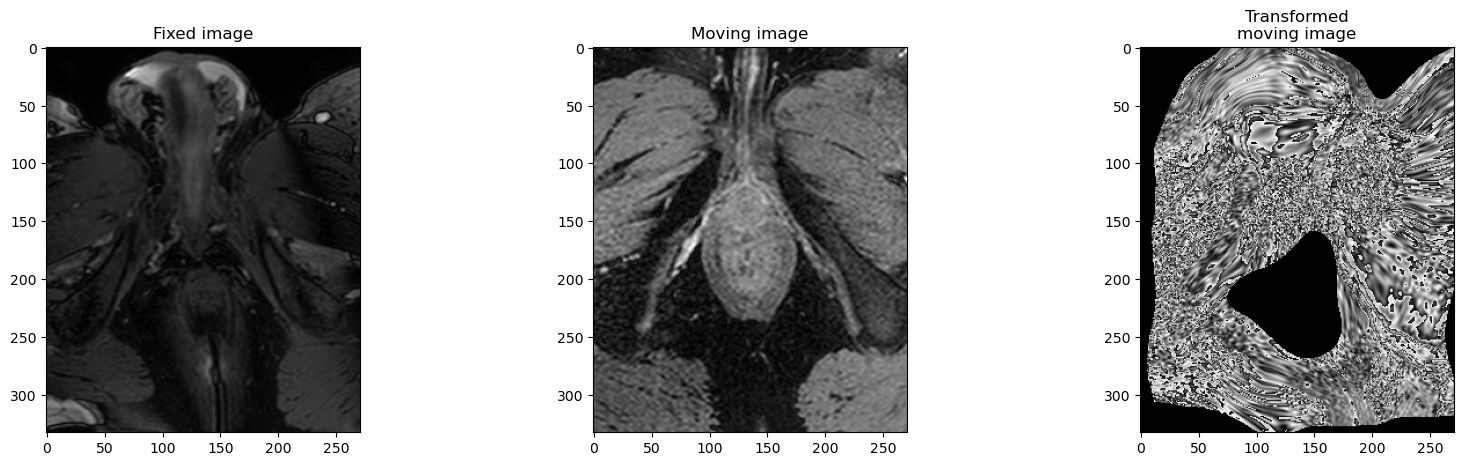

In [13]:
result_path_experiment = os.path.join(output_file_path_experiment, 'result.0.tiff')

transformed_moving_image = imageio.imread(result_path_experiment)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(image_array_fixed[10,:,:], cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(image_array_moving[10,:,:], cmap='gray')
ax[1].set_title('Moving image')
ax[2].imshow(transformed_moving_image[10,:,:], cmap='gray')
ax[2].set_title('Transformed\nmoving image')

plt.show()

In [15]:
# Make a new transformix object tr with the CORRECT PATH to transformix
transform_path = os.path.join(output_file_path_experiment, 'TransformParameters.0.txt')
tr = elastix.TransformixInterface(parameters=transform_path,
                                  transformix_path=TRANSFORMIX_PATH)

# Transform a new image with the transformation parameters
transformed_image_path = tr.transform_image(file_p_mask, output_dir=r'results')

C:\Users\20191679\Documents\Master\CS_image_analysis\TrainingData\results\TransformParameters.0.txt


TransformixError: Transformix crashed with code 4294967294 for command 'C:/Users/20191679/Documents/Master/CS_image_analysis/Transformix.exe -tp C:\Users\20191679\Documents\Master\CS_image_analysis\TrainingData\results\TransformParameters.0.txt -out results -in C:\Users\20191679\Documents\Master\CS_image_analysis\TrainingData\p135\prostaat.mhd'.